In [0]:
import pandas as pd


viz_folder = "/Workspace/social media/Visualizations"
gold_folder = "/Workspace/social media/Gold"

fact_comments = pd.read_csv(f"{gold_folder}/fact_comments.csv")
fact_user_stats = pd.read_csv(f"{gold_folder}/fact_user_stats.csv")
dim_user = pd.read_csv(f"{gold_folder}/dim_user.csv")
dim_video = pd.read_csv(f"{gold_folder}/dim_video.csv")
dim_date = pd.read_csv(f"{gold_folder}/dim_date.csv")

print("Data Loaded Successfully!")


Data Loaded Successfully!


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


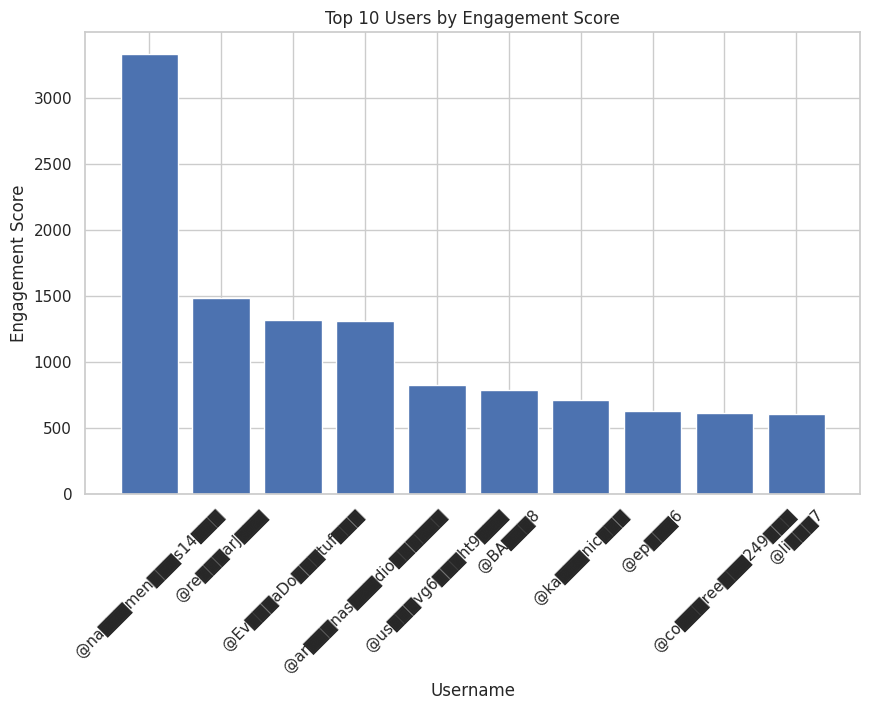

Saved: /Workspace/social media/Visualizations/top_users.png


In [0]:
import os

os.makedirs(viz_folder, exist_ok=True)

top_users = fact_user_stats.sort_values(
    "engagement_score",
    ascending=False
).head(10)

plt.figure(figsize=(10, 6))
plt.bar(
    top_users["username"],
    top_users["engagement_score"]
)
plt.xticks(rotation=45)
plt.title("Top 10 Users by Engagement Score")
plt.xlabel("Username")
plt.ylabel("Engagement Score")

path = f"{viz_folder}/top_users.png"
plt.savefig(path, bbox_inches="tight")
plt.show()

print("Saved:", path)




In [0]:
import numpy as np
import pandas as pd

# Random dates within 6 months
fact_comments["date"] = pd.to_datetime(
    np.random.choice(
        pd.date_range("2024-01-01", "2024-06-30"),
        size=len(fact_comments)
    )
)



In [0]:
df_time = fact_comments.copy()

comments_over_time = (
    df_time.groupby("date")["comment_id"]
    .count()
    .reset_index()
    .sort_values("date")
)

plt.figure(figsize=(7,7))
plt.plot(comments_over_time["date"], comments_over_time["comment_id"])
plt.xticks(rotation=45)
plt.title("Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Total Comments")
path = f"{viz_folder}/comments_over_time.png"
plt.savefig(path, bbox_inches="tight")
plt.show()






---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-7049711881290106>, line 1
----> 1 df_time = fact_comments.copy()
      3 comments_over_time = (
      4     df_time.groupby("date")["comment_id"]
      5     .count()
      6     .reset_index()
      7     .sort_values("date")
      8 )
     10 plt.figure(figsize=(7,7))

NameError: name 'fact_comments' is not defined

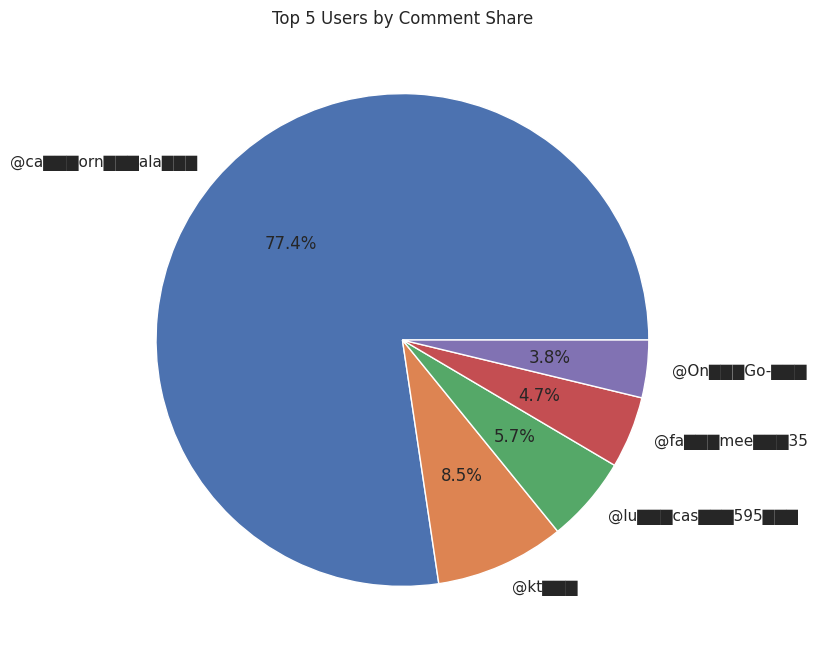

Saved: /Workspace/social media/Visualizations/pie_top_users.png


In [0]:
pie_users = fact_user_stats.sort_values("total_comments", ascending=False).head(5)

plt.figure(figsize=(8,8))
plt.pie(pie_users["total_comments"], labels=pie_users["username"], autopct='%1.1f%%')
plt.title("Top 5 Users by Comment Share")

path = f"{viz_folder}/pie_top_users.png"
plt.savefig(path, bbox_inches="tight")
plt.show()

print("Saved:", path)


/home/spark-894f9606-3316-4c8d-9b2a-c8/.ipykernel/4152/command-6522885643459505-4094719137:14: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  plt.savefig(path, bbox_inches="tight")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


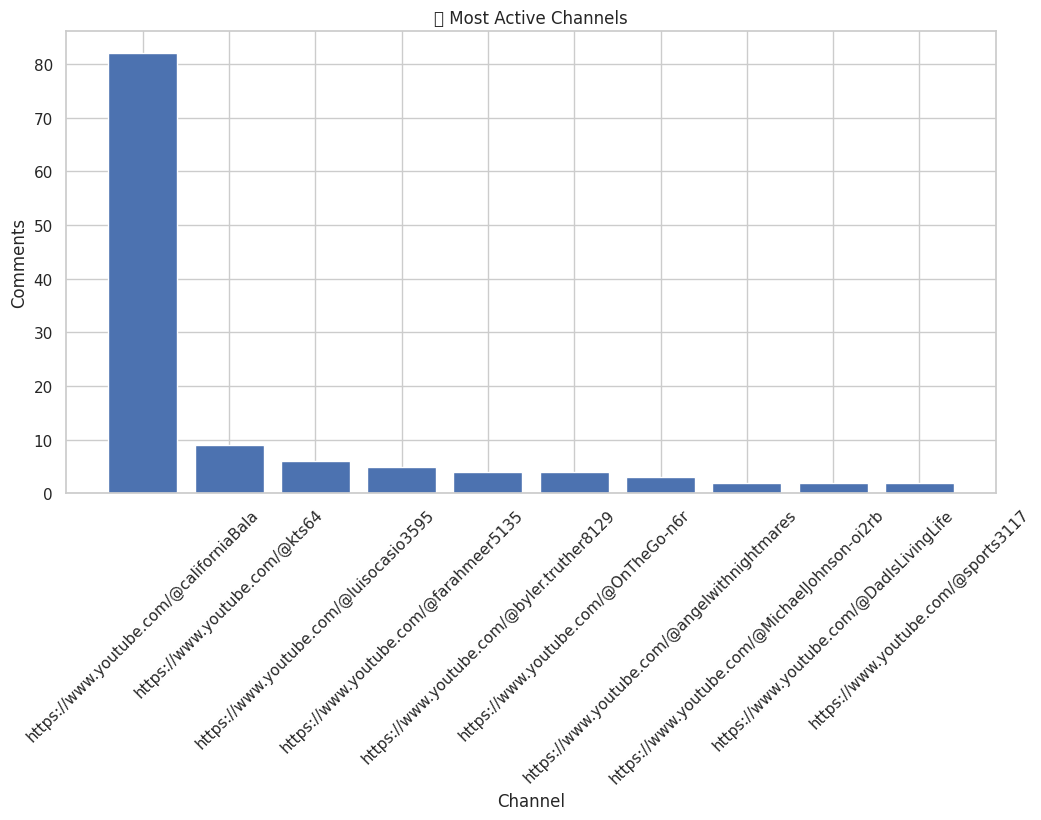

Saved: /Workspace/social media/Visualizations/active_channels.png


In [0]:
channel_activity = fact_comments.groupby("user_channel")["comment_id"] \
                                .count() \
                                .sort_values(ascending=False) \
                                .head(10)

plt.figure(figsize=(12,6))
plt.bar(channel_activity.index, channel_activity.values)
plt.xticks(rotation=45)
plt.title("📺 Most Active Channels")
plt.xlabel("Channel")
plt.ylabel("Comments")

path = f"{viz_folder}/active_channels.png"
plt.savefig(path, bbox_inches="tight")
plt.show()

print("Saved:", path)


/home/spark-894f9606-3316-4c8d-9b2a-c8/.ipykernel/4152/command-6522885643459506-482296318:9: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig(path, bbox_inches="tight")
/databricks/python/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


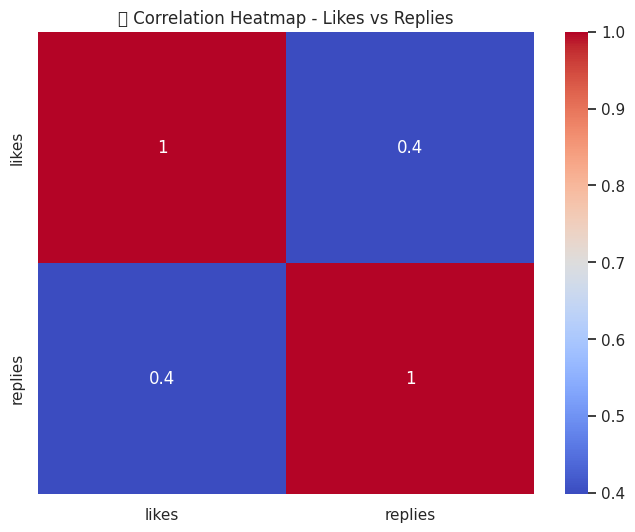

Saved: /Workspace/social media/Visualizations/engagement_heatmap.png


In [0]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(fact_comments[["likes","replies"]].corr(), annot=True, cmap="coolwarm")

plt.title("🔥 Correlation Heatmap - Likes vs Replies")

path = f"{viz_folder}/engagement_heatmap.png"
plt.savefig(path, bbox_inches="tight")
plt.show()

print("Saved:", path)


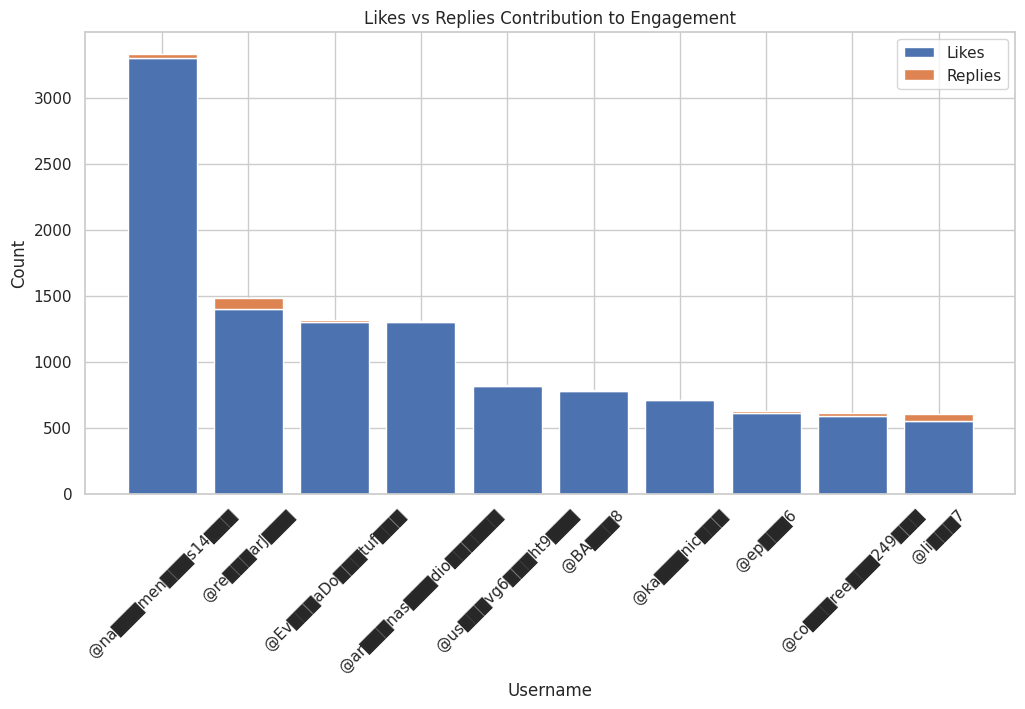

In [0]:
top_users = fact_user_stats.sort_values("engagement_score", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_users["username"], top_users["likes"], label="Likes")
plt.bar(top_users["username"], top_users["replies"], bottom=top_users["likes"], label="Replies")

plt.xticks(rotation=45)
plt.title("Likes vs Replies Contribution to Engagement")
plt.xlabel("Username")
plt.ylabel("Count")
plt.legend()
plt.show()

